In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.datasets import fetch_openml
house = fetch_openml("house_prices", as_frame=True)
house

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
 1        2          20       RL         80.0     9600   Pave   NaN      Reg   
 2        3          60       RL         68.0    11250   Pave   NaN      IR1   
 3        4          70       RL         60.0     9550   Pave   NaN      IR1   
 4        5          60       RL         84.0    14260   Pave   NaN      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
 1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
 1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
 1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
 1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
 
      LandContour Utilities  .

In [4]:
house.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
type(house)

sklearn.utils._bunch.Bunch

In [6]:
house.DESCR

"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.\n\nWith 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.\n\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD

In [8]:
!pip install kagglehub[pandas-datasets]

In [9]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "housing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "camnugent/california-housing-prices",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipykernel_4077/4268178932.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 400k/400k [00:00<00:00, 12.2MB/s]

Extracting zip of housing.csv...
First 5 records:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Attribute Information
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea    


In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}")
    print("---------------------------------------------")

longitude: 
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 -1

<Axes: xlabel='housing_median_age', ylabel='total_bedrooms'>

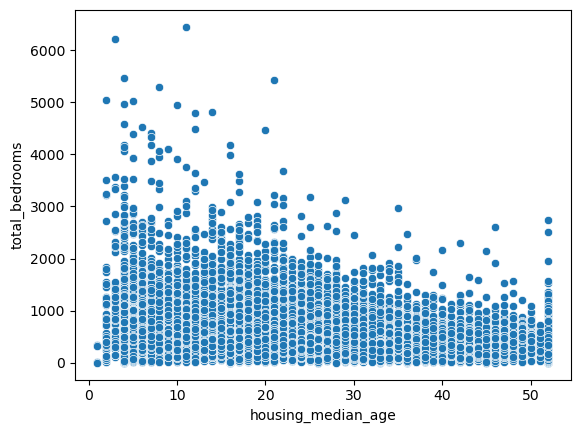

In [18]:
sns.scatterplot(x = df["housing_median_age"], y = df["total_bedrooms"])

<Axes: xlabel='housing_median_age', ylabel='total_bedrooms'>

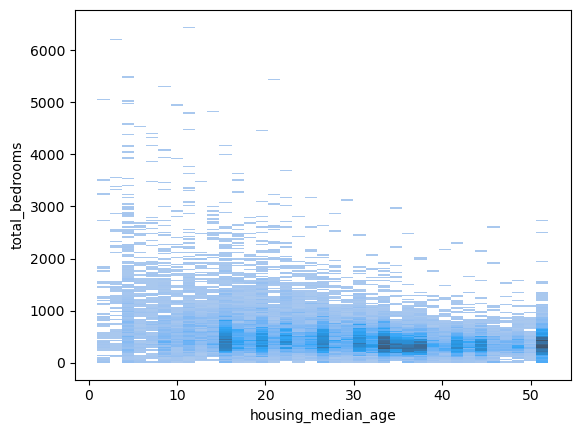

In [19]:
sns.histplot(x = df["housing_median_age"], y = df["total_bedrooms"], kde = True)

In [20]:
# total_bedrooms is the only column with missing values so I will deal with it
# Will use mean imputation
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [21]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: xlabel='housing_median_age', ylabel='total_bedrooms'>

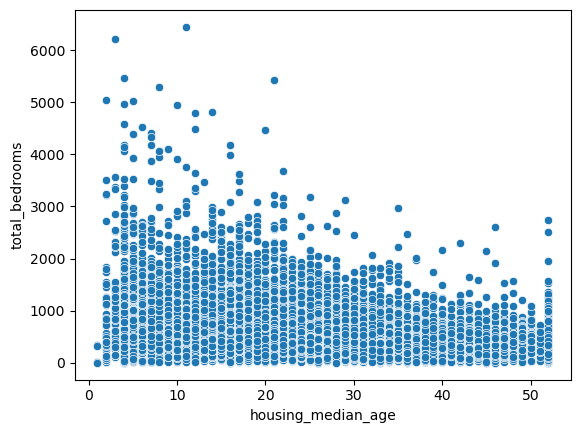

In [22]:
sns.scatterplot(x = df["housing_median_age"], y = df["total_bedrooms"])

In [26]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories = [['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']])
df["ocean_proximity"] = encoder.fit_transform(df[["ocean_proximity"]])

In [33]:
df["ocean_proximity"].unique()

array([3., 1., 0., 2., 4.])

In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


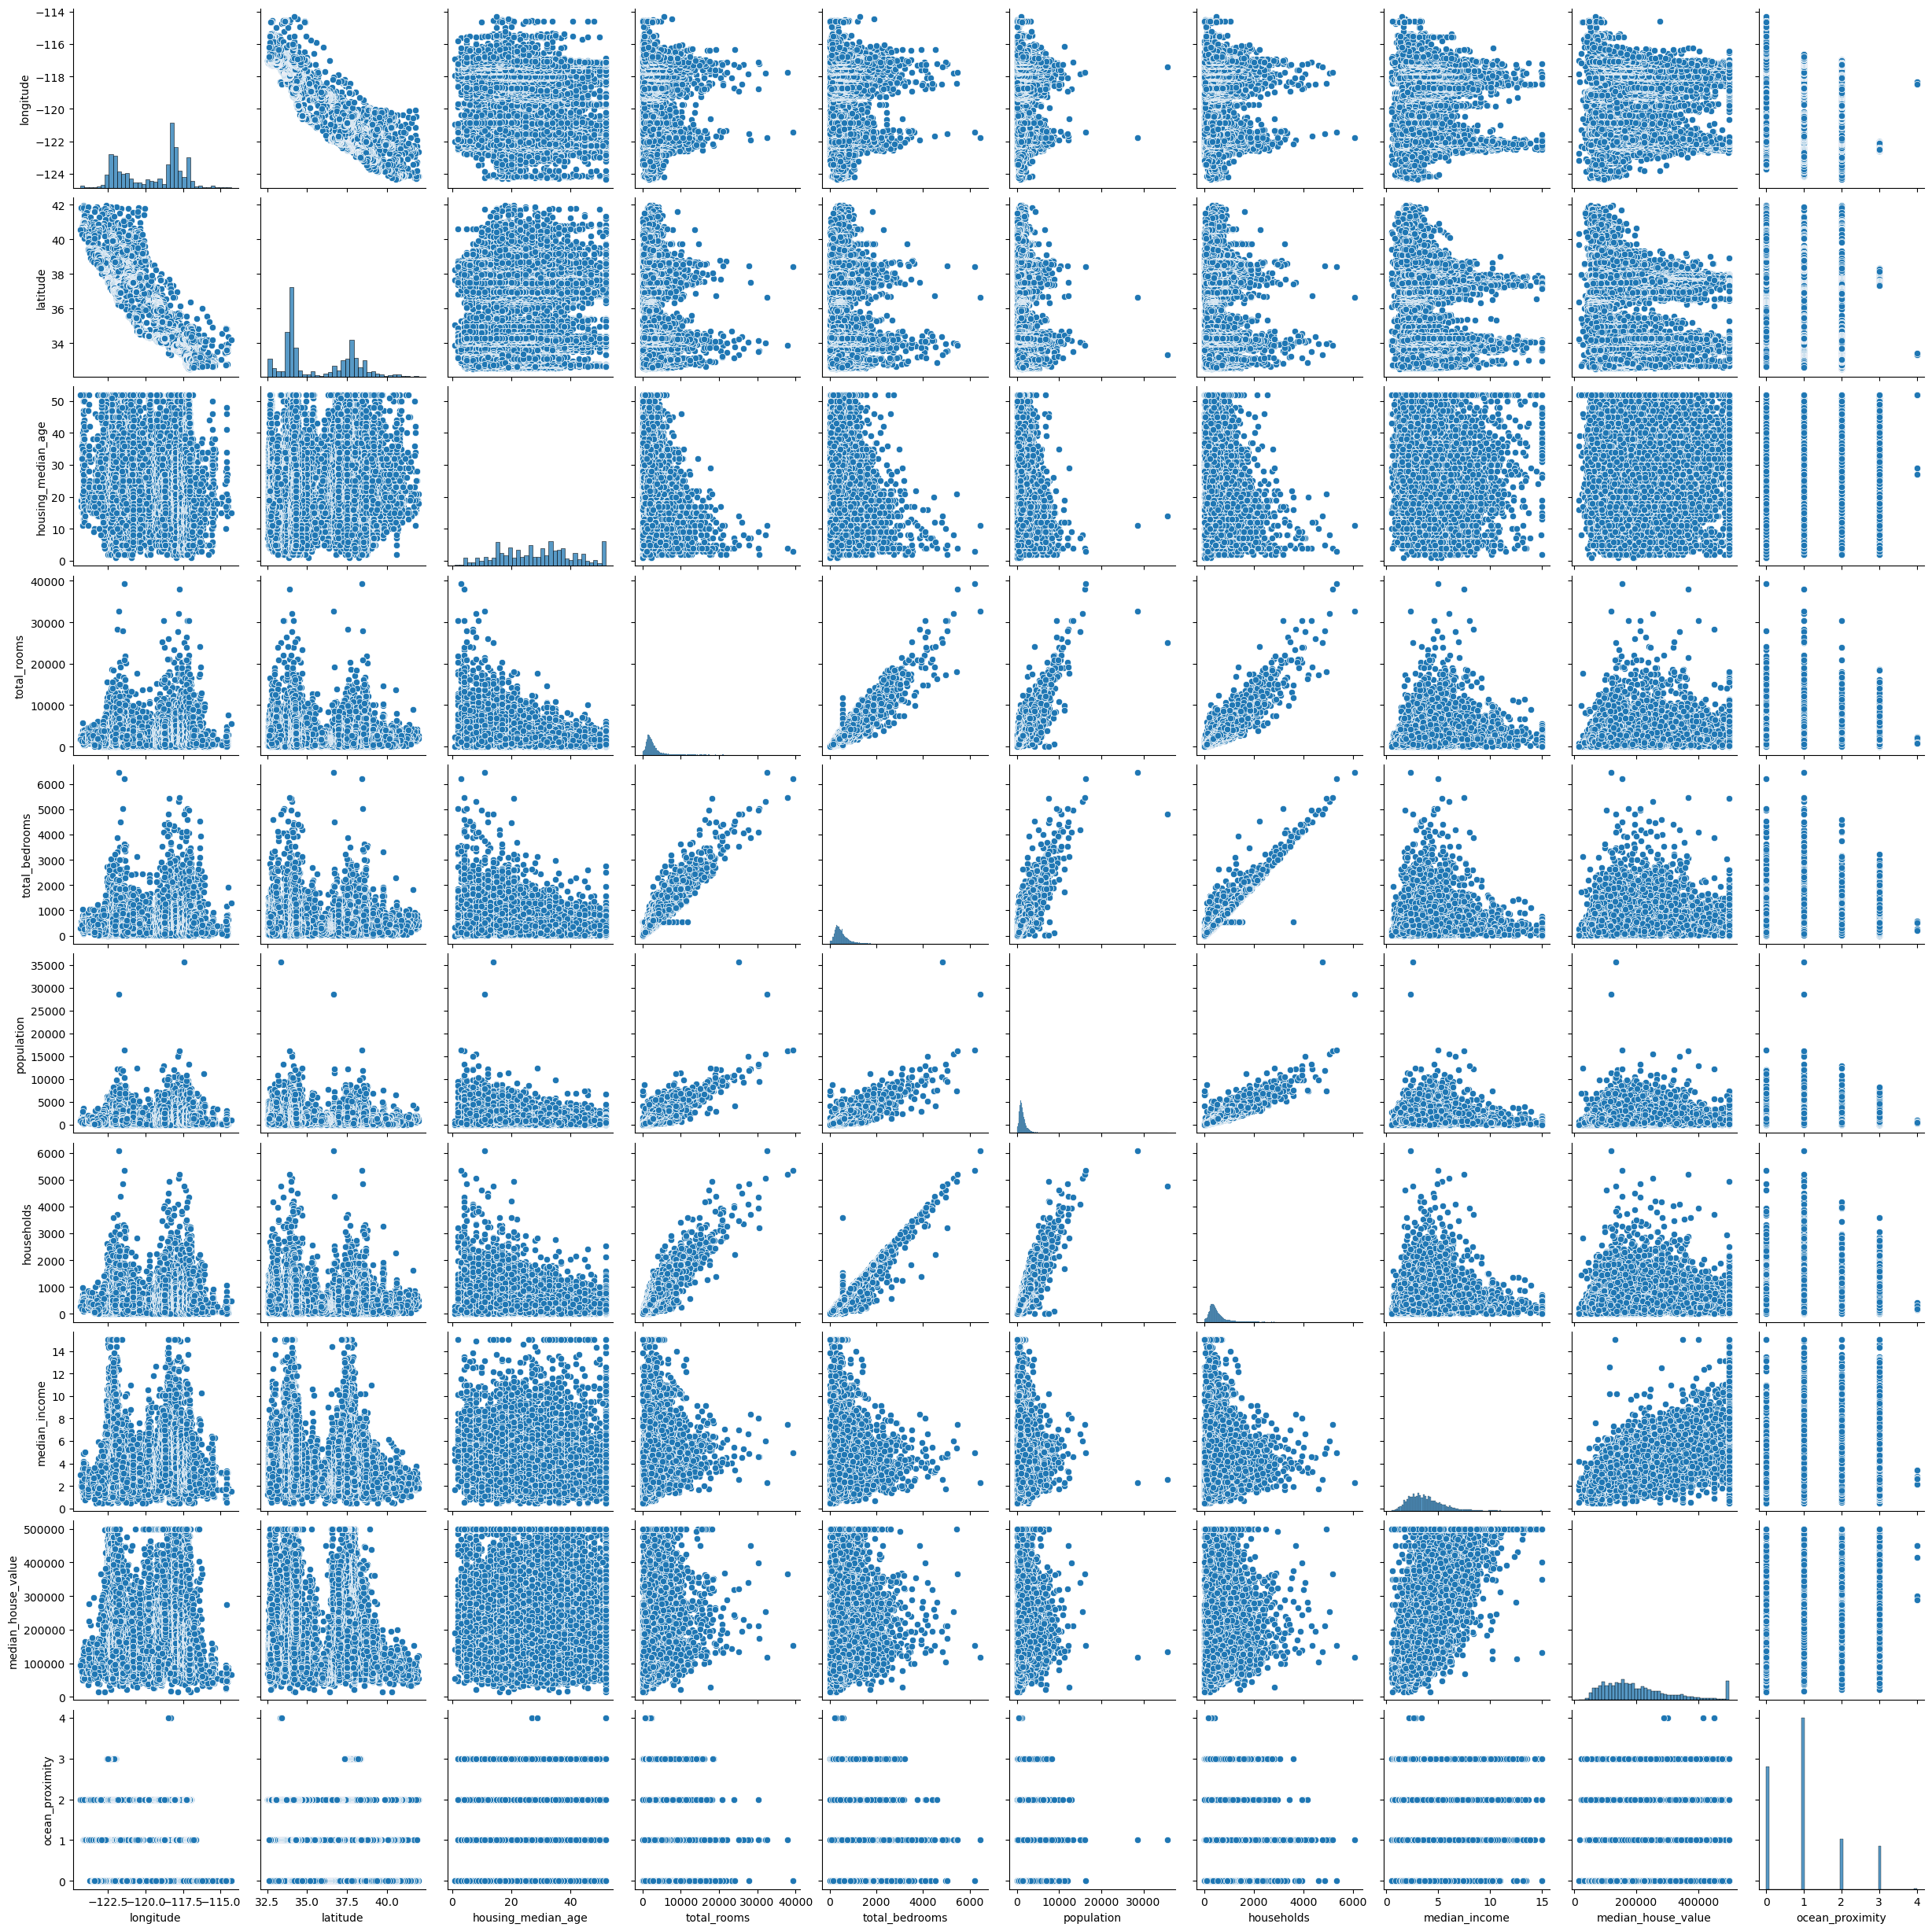

In [37]:
sns.pairplot(df)

<Axes: >

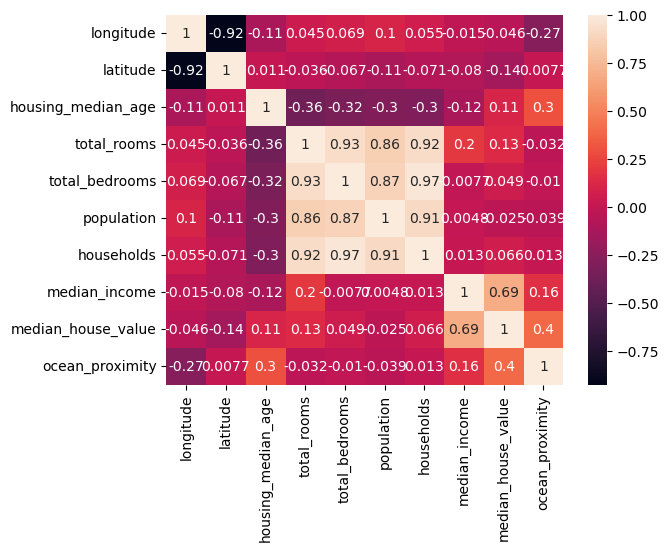

In [39]:
sns.heatmap(df.corr(), annot = True)

In [40]:
## A function that checks for multicollinearity
# THe function will find all the columns that have a correlation
# above the given threshold a return a set containing their names
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # abs is used to handle negative correlation
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [41]:
df_copy = df
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [42]:
df.to_csv("cleaned_cali_housing.csv")

In [43]:
multicorr = correlation(df_copy, 0.80)

In [44]:
multicorr

{'households', 'latitude', 'population', 'total_bedrooms'}

In [45]:
df_copy = df_copy.drop(multicorr, axis = 1)
df_copy.head()

,longitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity
0,-122.23,41.0,880.0,8.3252,452600.0,3.0
1,-122.22,21.0,7099.0,8.3014,358500.0,3.0
2,-122.24,52.0,1467.0,7.2574,352100.0,3.0
3,-122.25,52.0,1274.0,5.6431,341300.0,3.0
4,-122.25,52.0,1627.0,3.8462,342200.0,3.0


In [46]:
X = df_copy.drop("median_house_value", axis = 1)
y = df["median_house_value"]
X.shape, y.shape

((20640, 5), (20640,))

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
len(X_train), len(X_test)

(16512, 4128)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[ 1.27258656,  0.34849025,  0.22256942, -0.326196  ,  1.02112707],
        [ 0.70916212,  1.61811813,  0.34029326, -0.03584338,  1.02112707],
        [-0.44760309, -1.95271028, -0.34259695,  0.14470145,  1.02112707],
        ...,
        [ 0.59946887,  0.58654547, -0.24878577, -0.49697313, -0.03710742],
        [-1.18553953, -1.07984112,  0.42904599,  0.96545045, -0.03710742],
        [-1.41489815,  1.85617335,  0.72841402, -0.68544764,  2.07936156]],
       shape=(16512, 5)),
 array([[ 0.28534728, -0.28632369, -0.52286157, -1.15508475, -1.09534191],
        [ 0.06097472,  0.11043502,  0.13841528, -0.70865905, -1.09534191],
        [-1.42487026,  1.85617335,  0.54630997, -0.21040155,  2.07936156],
        ...,
        [-1.23041404, -0.28632369,  0.67553027,  2.80902421, -0.03710742],
        [-0.08860699,  0.58654547, -0.06208313, -0.57542978, -1.09534191],
        [ 0.60445493, -0.92113763, -0.39318141, -0.17259111, -0.03710742]],
       shape=(4128, 5)))

<Axes: >

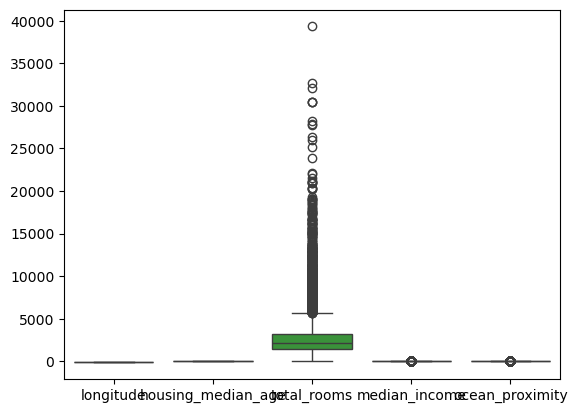

In [55]:
sns.boxplot(X_train)

<Axes: >

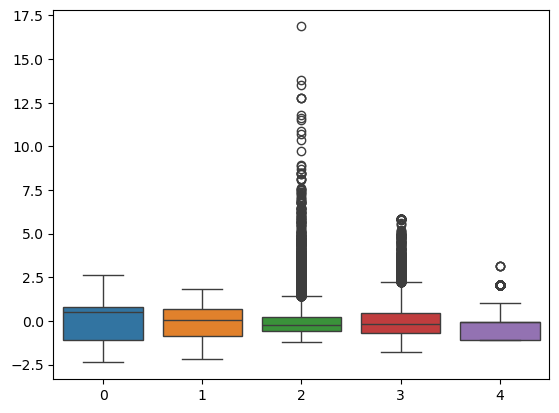

In [54]:
sns.boxplot(X_train_scaled)

In [56]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

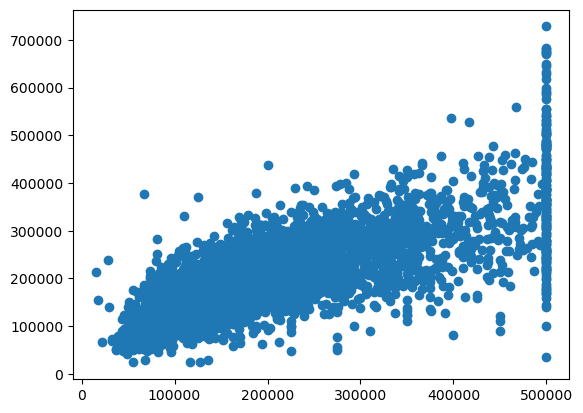

In [59]:
plt.scatter(y_test, y_pred)

In [60]:
linreg.coef_

array([ 5577.92854841, 15226.83281247,  6933.3994805 , 75455.59612432,
       30639.13286817])

In [61]:
linreg.intercept_

np.float64(207194.6937378876)

In [62]:
## Getting the performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


print(f"MSE: {mse} \nMAE: {mae} \nRMSE: {rmse} \nR^2 Scored: {score} \nAjusted R Squared: {adjusted_score}")

MSE: 5740388205.408916 
MAE: 54942.140676022806 
RMSE: 75765.34963562775 
R^2 Scored: 0.5619391883963702 
Ajusted R Squared: 0.5614078191440611


In [63]:
residuals = y_test - y_pred
residuals

20046    -32383.394710
3024     -77343.452864
15663    220868.843472
20484    -50711.711748
9814      46633.215807
             ...      
15362     35540.722154
16623     72897.793598
18086     88525.892887
2144     -65921.509263
3665     -28154.302947
Name: median_house_value, Length: 4128, dtype: float64

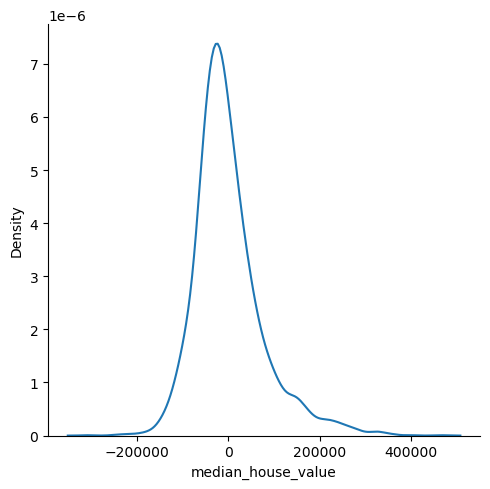

In [64]:
sns.displot(residuals, kind = "kde")
#Since we got a normal distribution we can tell that the model is perfroming well but still needs some work.

## Pickling 
If you want to save a model that was created/trained and deploy it to the cloud you will want to "pickle" the model.
Pickling is a way to save a Python object to a file so you can use it later.

Think of it like this:

Pickling = packing a Python object into a box
Unpickling = opening the box and getting the object back

In [65]:
import pickle
pickle.dump(linreg, open("linreg.pkl", "wb"))

In [66]:
#Loading the pickled model
model = pickle.load(open("linreg.pkl", "rb"))

In [68]:
model.predict(X_test_scaled)

array([ 80083.39470965, 123143.4528637 , 279132.1565276 , ...,
       411475.10711323, 138221.509263  , 179654.30294718], shape=(4128,))